In [19]:
import os
import sys
sys.path.append(os.path.join('..', 'src'))

import pickle
import time
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 5)
import seaborn as sns
sns.set()

In [20]:
DATA_DIR = os.path.join('..', 'data', 'processed', 'filtering')

In [21]:
with open(os.path.join(DATA_DIR, 'user_to_items.pickle'), 'rb') as file:
    user_to_items = pickle.load(file)
    
with open(os.path.join(DATA_DIR, 'item_to_users.pickle'), 'rb') as file:
    item_to_users = pickle.load(file)

with open(os.path.join(DATA_DIR, 'train_ratings.pickle'), 'rb') as file:
    train_ratings = pickle.load(file)

with open(os.path.join(DATA_DIR, 'test_ratings.pickle'), 'rb') as file:
    test_ratings = pickle.load(file)

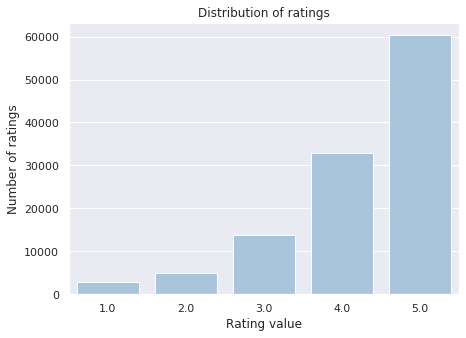

In [22]:
ratings = np.fromiter(train_ratings.values(), dtype=np.float32)
sns.countplot(ratings, color='#a2c5e3')
plt.xlabel("Rating value")
plt.ylabel("Number of ratings")
plt.title("Distribution of ratings")
plt.savefig("rate-dist.png", pad_inches=0.1)

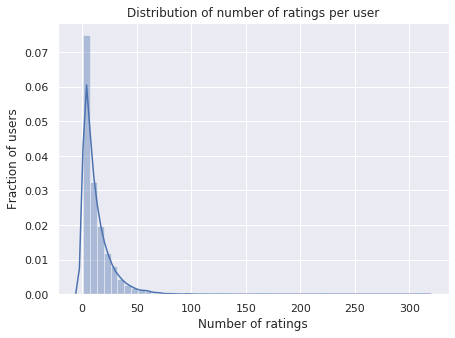

In [23]:
user_ratings_number = np.array([len(items) for items in user_to_items.values()])
sns.distplot(user_ratings_number)
plt.xlabel("Number of ratings")
plt.ylabel("Fraction of users")
plt.title("Distribution of number of ratings per user")
plt.savefig("user_dist.png")

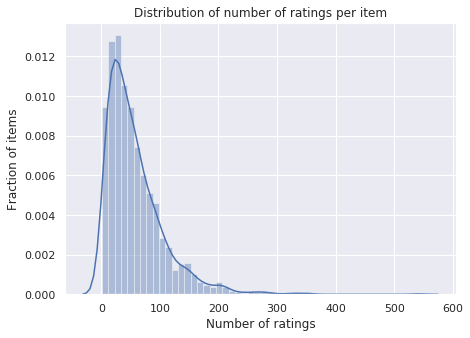

In [24]:
item_ratings_number = np.array([len(users) for users in item_to_users.values()])
sns.distplot(item_ratings_number, kde=True)
plt.xlabel("Number of ratings")
plt.ylabel("Fraction of items")
plt.title("Distribution of number of ratings per item")
plt.savefig("item_dist.png")

Text(0.5, 1.0, 'Distribution of average ratings per item')

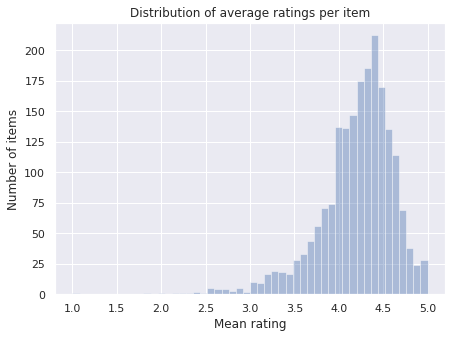

In [25]:
item_ratings_average = np.array([
    np.mean([
        train_ratings[(user, item)] for user in users
    ]) 
    for item, users in item_to_users.items()
])
sns.distplot(item_ratings_average, kde=False)
plt.xlabel("Mean rating")
plt.ylabel("Number of items")
plt.title("Distribution of average ratings per item")

Text(0.5, 1.0, 'Distribution of average ratings per user')

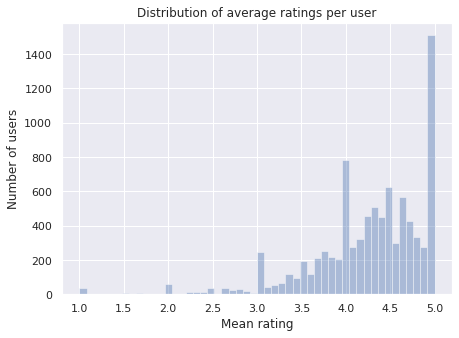

In [26]:
user_ratings_average = np.array([
    np.mean([
        train_ratings[(user, item)] for item in items
    ]) 
    for user, items in user_to_items.items()
])
sns.distplot(user_ratings_average, kde=False)
plt.xlabel("Mean rating")
plt.ylabel("Number of users")
plt.title("Distribution of average ratings per user")